In [28]:
id=59
id%2 ## Mod ID

1

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
from sklearn import datasets
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

# Read CSV File

In [30]:
df_wine = pd.read_csv("winequality-white.csv", sep=";")


In [31]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
df_wine.density.value_counts()

0.9920    64
0.9928    61
0.9932    53
0.9930    52
0.9934    50
          ..
0.9961     1
0.9921     1
0.9950     1
1.0005     1
0.9894     1
Name: density, Length: 890, dtype: int64

### Rename Columns

In [33]:
df_wine.rename(columns={
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'
}, inplace=True)
df_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [35]:
df_wine.shape

(4898, 12)

In [36]:
x = .59

In [37]:
datarowsSeries = datarowsSeries = [pd.Series([7.8+x,.88+x,0.00+x,1.9,0.09+x,25.0+x,67.0+x,.991+x,3.22,0.68+x,9.8+x,5], index=df_wine.columns), 
                  pd.Series([7.2+x,.83+x,0.01+x,2.2,0.19+x,15.0+x,60.0+x,.996+x,3.22,0.55+x,9.6+x,6], index=df_wine.columns),
                  pd.Series([7.9+x,.89+x,0.01+x,1.7,0.08+x,22.0+x,57.0+x,.997+x,3.26,0.64+x,9.8+x,2], index=df_wine.columns),
                  pd.Series([7.2+x,.86+x,0.02+x,2.3,0.07+x,11.0+x,38.0+x,.994+x,3.12,0.08+x,9.4+x,3], index=df_wine.columns)]
new_data = df_wine.append(datarowsSeries , ignore_index=True)
new_data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0000            0.2700       0.3600         20.7000     0.0450   
1            6.3000            0.3000       0.3400          1.6000     0.0490   
2            8.1000            0.2800       0.4000          6.9000     0.0500   
3            7.2000            0.2300       0.3200          8.5000     0.0580   
4            7.2000            0.2300       0.3200          8.5000     0.0580   
...             ...               ...          ...             ...        ...   
4897         6.0000            0.2100       0.3800          0.8000     0.0200   
4898         8.3900            1.4700       0.5900          1.9000     0.6800   
4899         7.7900            1.4200       0.6000          2.2000     0.7800   
4900         8.4900            1.4800       0.6000          1.7000     0.6700   
4901         7.7900            1.4500       0.6100          2.3000     0.6600   

      free_sulfur_dioxide  total_sulfur_dioxide  density     pH  sulphates  \
0                 45.0000              170.0000   1.0010 3.0000     0.4500   
1                 14.0000              132.0000   0.9940 3.3000     0.4900   
2                 30.0000               97.0000   0.9951 3.2600     0.4400   
3                 47.0000              186.0000   0.9956 3.1900     0.4000   
4                 47.0000              186.0000   0.9956 3.1900     0.4000   
...                   ...                   ...      ...    ...        ...   
4897              22.0000               98.0000   0.9894 3.2600     0.3200   
4898              25.5900               67.5900   1.5810 3.2200     1.2700   
4899              15.5900               60.5900   1.5860 3.2200     1.1400   
4900              22.5900               57.5900   1.5870 3.2600     1.2300   
4901              11.5900               38.5900   1.5840 3.1200     0.6700   

      alcohol  quality  
0      8.8000   6.0000  
1      9.5000   6.0000  
2     10.1000   6.0000  
3      9.9000   6.0000  
4      9.9000   6.0000  
...       ...      ...  
4897  11.8000   6.0000  
4898  10.3900   5.0000  
4899  10.1900   6.0000  
4900  10.3900   2.0000  
4901   9.9900   3.0000  

[4902 rows x 12 columns]

In [38]:
new_data.shape

(4902, 12)

In [39]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4902 non-null   float64
 1   volatile_acidity      4902 non-null   float64
 2   citric_acid           4902 non-null   float64
 3   residual_sugar        4902 non-null   float64
 4   chlorides             4902 non-null   float64
 5   free_sulfur_dioxide   4902 non-null   float64
 6   total_sulfur_dioxide  4902 non-null   float64
 7   density               4902 non-null   float64
 8   pH                    4902 non-null   float64
 9   sulphates             4902 non-null   float64
 10  alcohol               4902 non-null   float64
 11  quality               4902 non-null   float64
dtypes: float64(12)
memory usage: 459.7 KB


In [40]:
new_data.describe().T

count     mean     std    min      25%      50%  \
fixed_acidity        4,902.0000   6.8558  0.8443 3.8000   6.3000   6.8000   
volatile_acidity     4,902.0000   0.2792  0.1062 0.0800   0.2100   0.2600   
citric_acid          4,902.0000   0.3344  0.1212 0.0000   0.2700   0.3200   
residual_sugar       4,902.0000   6.3879  5.0715 0.6000   1.7000   5.2000   
chlorides            4,902.0000   0.0463  0.0287 0.0090   0.0360   0.0430   
free_sulfur_dioxide  4,902.0000  35.2946 17.0074 2.0000  23.0000  34.0000   
total_sulfur_dioxide 4,902.0000 138.2935 42.5467 9.0000 108.0000 134.0000   
density              4,902.0000   0.9945  0.0171 0.9871   0.9917   0.9938   
pH                   4,902.0000   3.1883  0.1509 2.7200   3.0900   3.1800   
sulphates            4,902.0000   0.4903  0.1155 0.2200   0.4100   0.4700   
alcohol              4,902.0000  10.5140  1.2302 8.0000   9.5000  10.4000   
quality              4,902.0000   5.8764  0.8880 2.0000   5.0000   6.0000   

                          75%      max  
fixed_acidity          7.3000  14.2000  
volatile_acidity       0.3200   1.4800  
citric_acid            0.3900   1.6600  
residual_sugar         9.9000  65.8000  
chlorides              0.0500   0.7800  
free_sulfur_dioxide   46.0000 289.0000  
total_sulfur_dioxide 167.0000 440.0000  
density                0.9961   1.5870  
pH                     3.2800   3.8200  
sulphates              0.5500   1.2700  
alcohol               11.4000  14.2000  
quality                6.0000   9.0000

In [41]:
new_data.quality.median()

6.0

## Checking for missing values

In [42]:
new_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Checking for outliers in our dataset

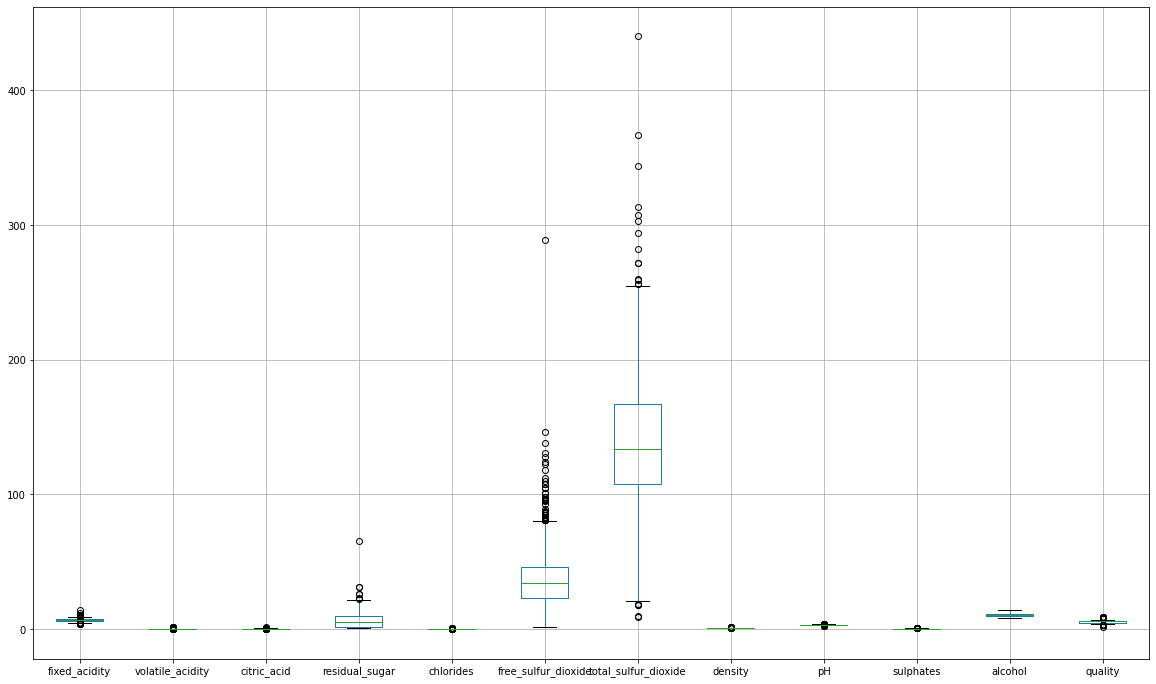

In [43]:
####Figure 1
new_data.boxplot(figsize=(20,12))
plt.show()


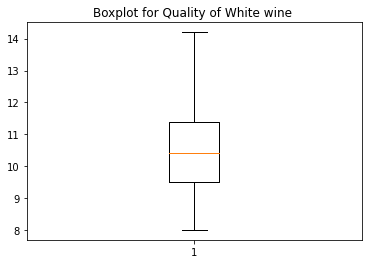

In [44]:
####Figure 2
plt.boxplot(new_data.alcohol)
plt.title('Boxplot for Quality of White wine ')
plt.show()

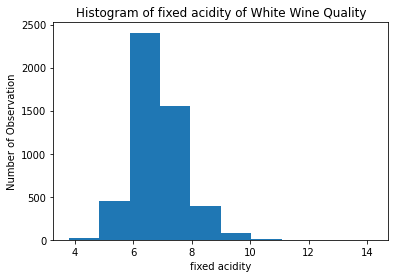

In [45]:
plt.hist(new_data["fixed_acidity"], bins=10)
plt.xlabel('fixed acidity')
plt.ylabel('Number of Observation')
plt.title('Histogram of fixed acidity of White Wine Quality')
plt.show()


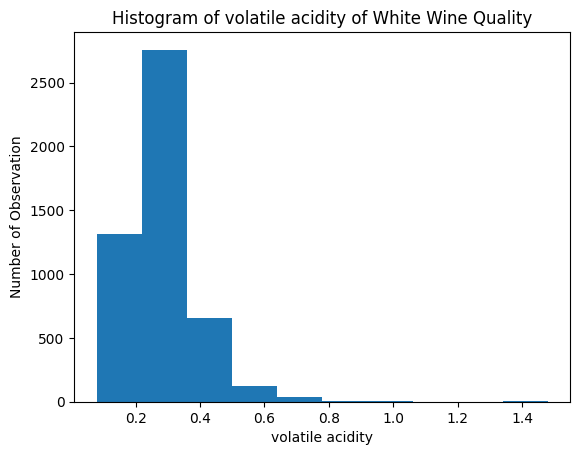

In [43]:
## Volatile Acidity
plt.hist(new_data["volatile_acidity"], bins=10)
plt.xlabel('volatile acidity')
plt.ylabel('Number of Observation')
plt.title('Histogram of volatile acidity of White Wine Quality')
plt.show()


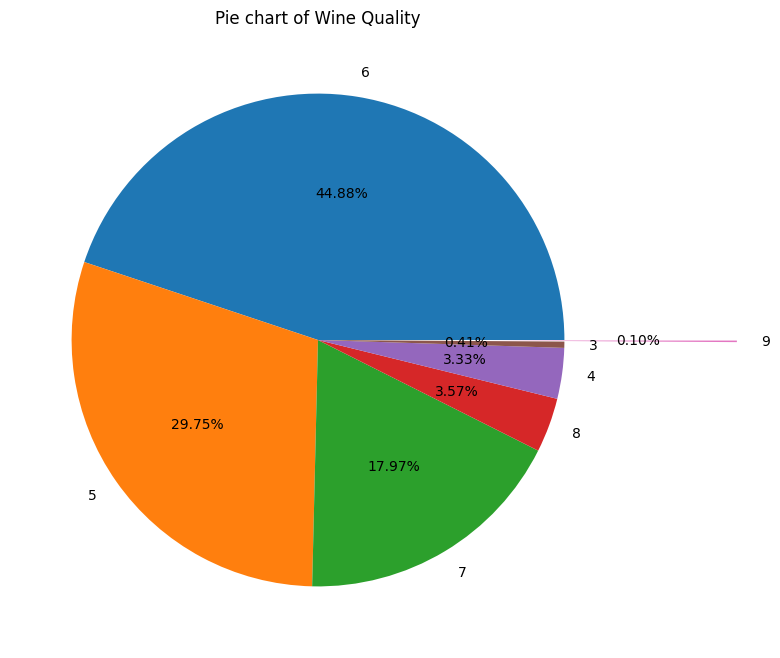

In [45]:
plt.figure(figsize=(8,8))
plt.title("Pie chart of Wine Quality")
plt.pie(df_wine['quality'].value_counts(), labels=df_wine['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0,0.7))
plt.show()

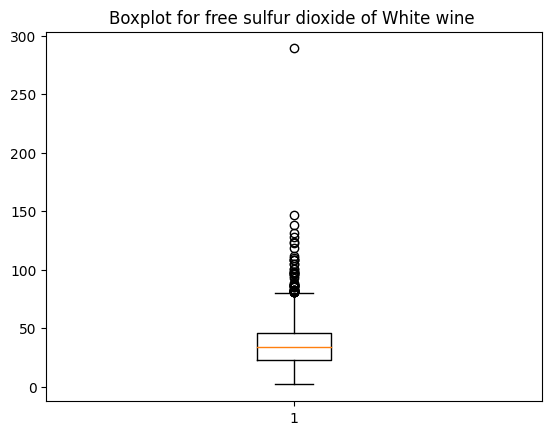

In [20]:
####Figure 3
plt.boxplot(new_data.free_sulfur_dioxide)
plt.title('Boxplot for free sulfur dioxide of White wine ')
plt.show()


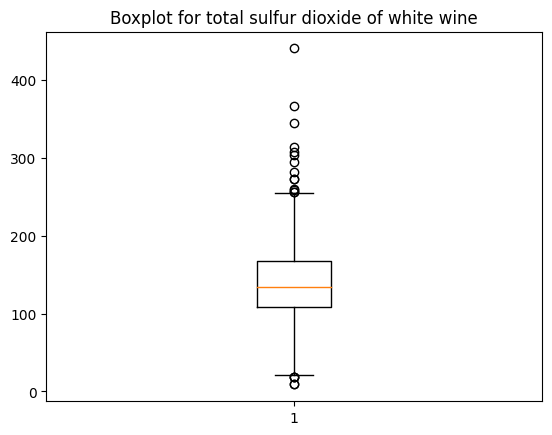

In [21]:
####Figure 4
plt.boxplot(new_data.total_sulfur_dioxide)
plt.title('Boxplot for total sulfur dioxide of white wine')
plt.show()

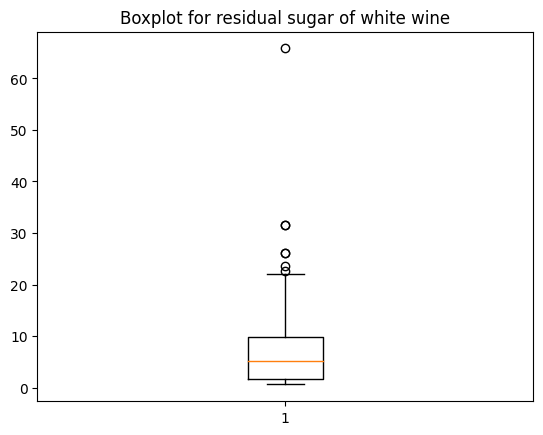

In [22]:
####Figure 5
plt.boxplot(new_data.residual_sugar)
plt.title('Boxplot for residual sugar of white wine')
plt.show()

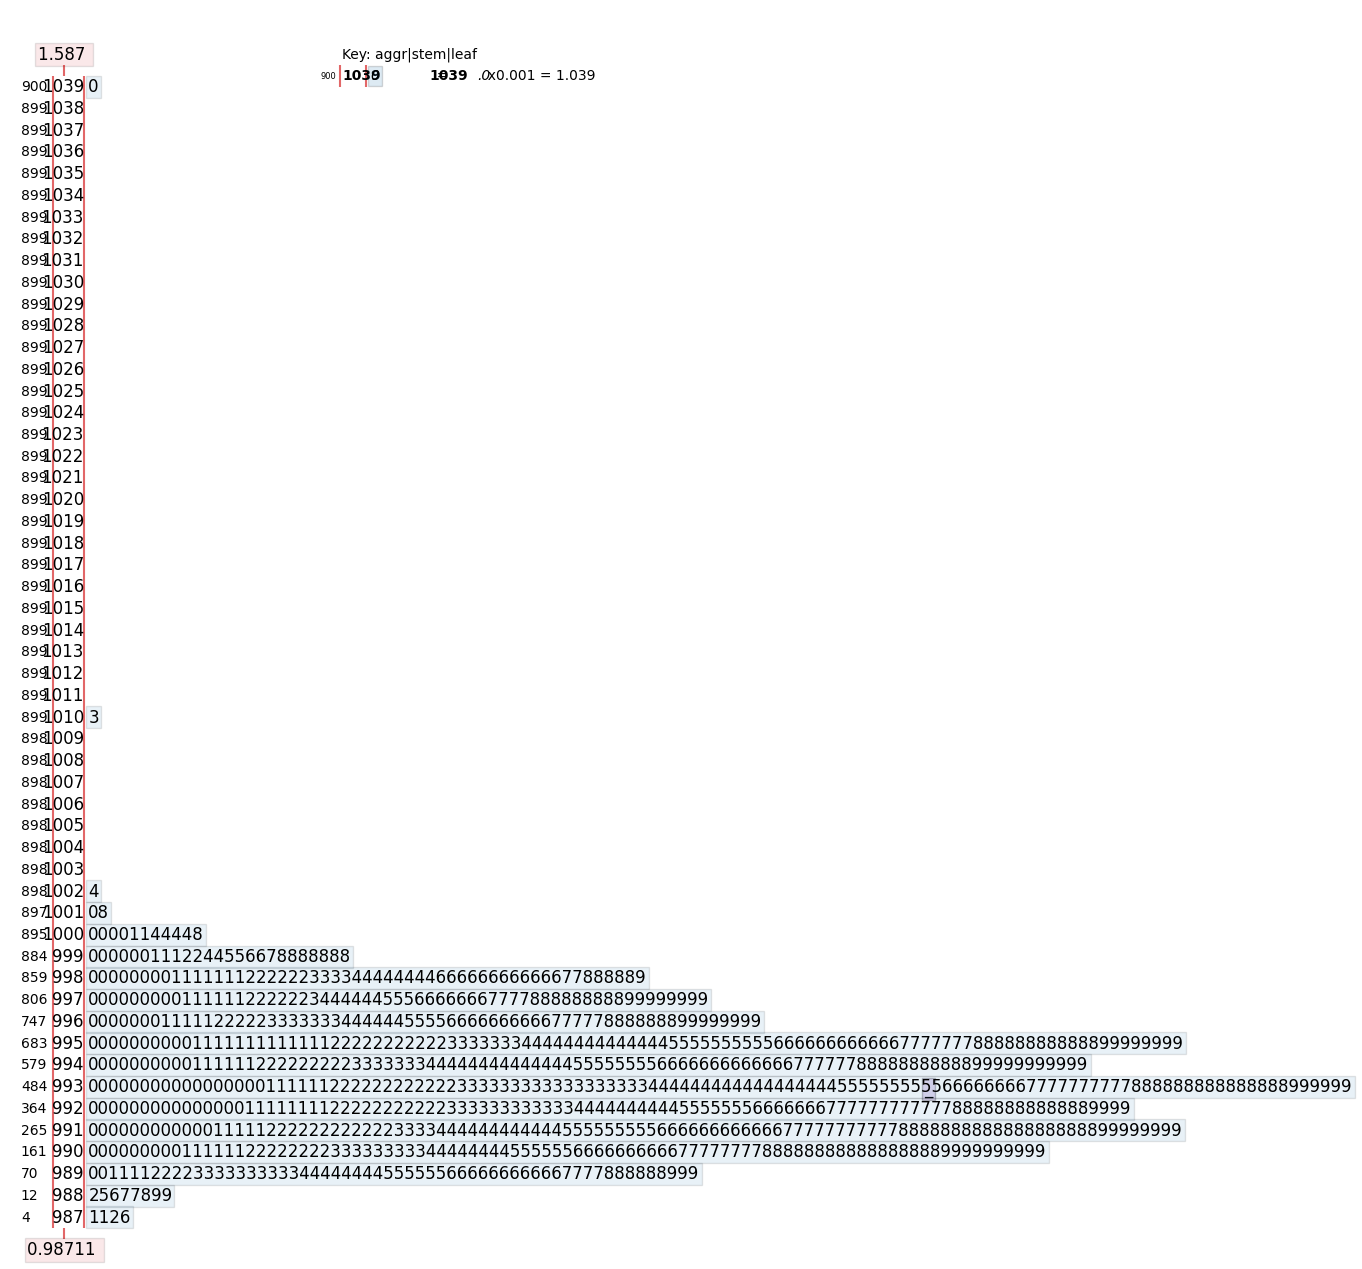

In [23]:
####Figure 6
import stemgraphic
fig = stemgraphic.stem_graphic(new_data.density)
plt.show()

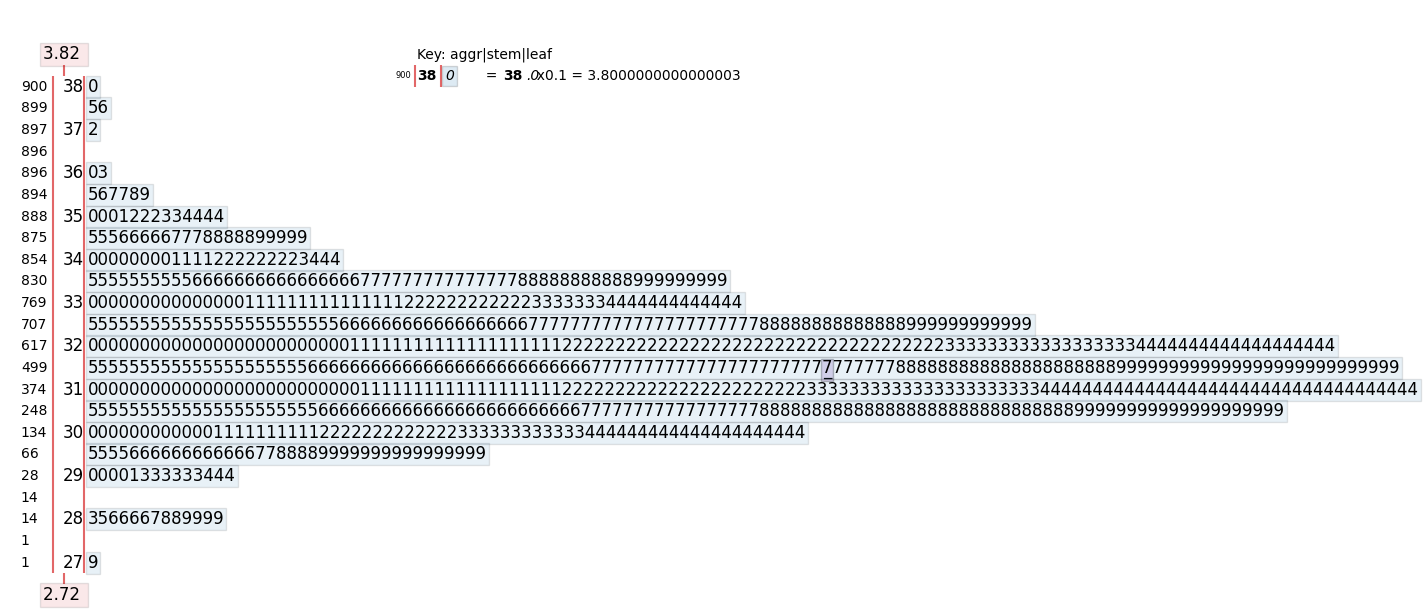

In [24]:

fig = stemgraphic.stem_graphic(df_wine.pH)

plt.show()

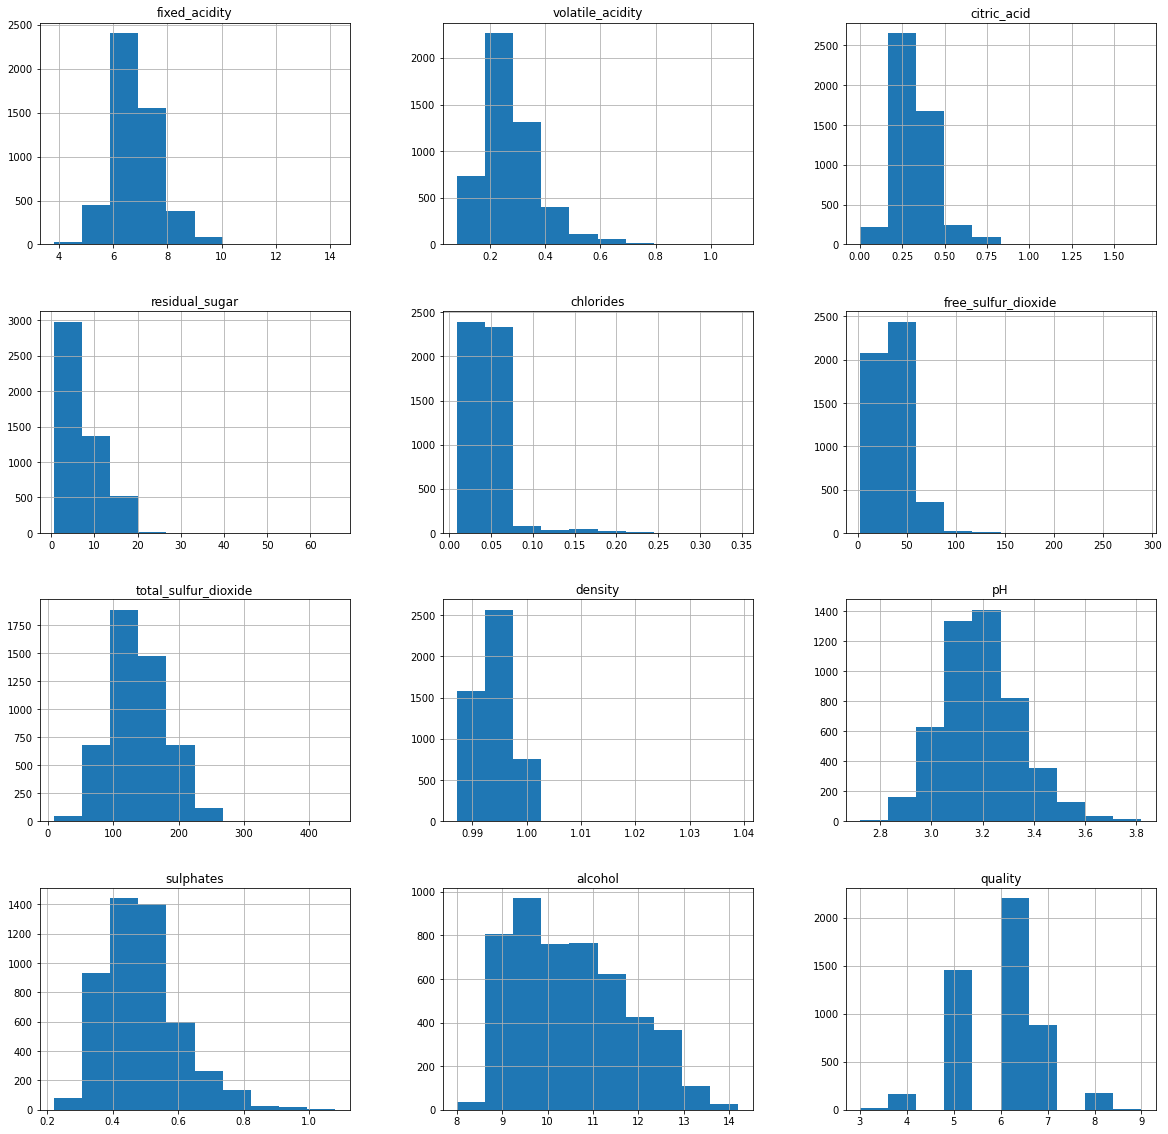

In [25]:
####Figure 7
%matplotlib inline
df_wine.hist(bins=10, figsize=(20,20))
plt.show()

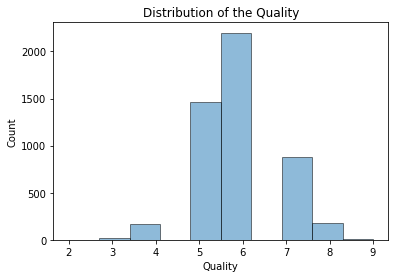

In [26]:
plt.hist(new_data.quality,bins=10,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

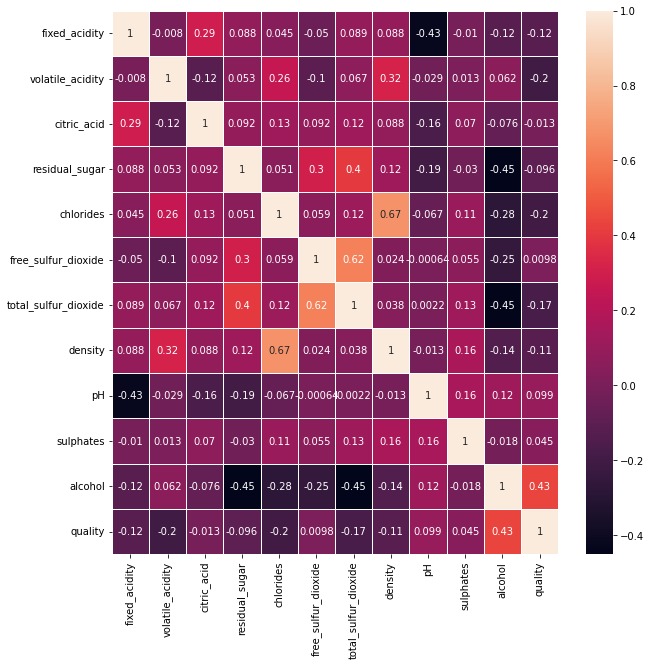

In [27]:
#######correlation plot
corr_matrix = new_data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)
plt.show()

# Correlation

In [28]:
corr_matrix = new_data.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.0000
alcohol                 0.4346
pH                      0.0990
sulphates               0.0449
free_sulfur_dioxide     0.0098
citric_acid            -0.0130
residual_sugar         -0.0957
density                -0.1130
fixed_acidity          -0.1160
total_sulfur_dioxide   -0.1704
chlorides              -0.1963
volatile_acidity       -0.2035
Name: quality, dtype: float64

# Co-Variance

In [29]:
new_data.cov()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity                0.7129           -0.0007       0.0298   
volatile_acidity            -0.0007            0.0113      -0.0016   
citric_acid                  0.0298           -0.0016       0.0147   
residual_sugar               0.3762            0.0286       0.0568   
chlorides                    0.0011            0.0008       0.0004   
free_sulfur_dioxide         -0.7239           -0.1819       0.1899   
total_sulfur_dioxide         3.1804            0.3031       0.6046   
density                      0.0013            0.0006       0.0002   
pH                          -0.0542           -0.0005      -0.0030   
sulphates                   -0.0010            0.0002       0.0010   
alcohol                     -0.1257            0.0081      -0.0113   
quality                     -0.0870           -0.0192      -0.0014   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity                 0.3762     0.0011              -0.7239   
volatile_acidity              0.0286     0.0008              -0.1819   
citric_acid                   0.0568     0.0004               0.1899   
residual_sugar               25.7204     0.0075              25.8372   
chlorides                     0.0075     0.0008               0.0288   
free_sulfur_dioxide          25.8372     0.0288             289.2529   
total_sulfur_dioxide         86.7524     0.1410             445.6476   
density                       0.0106     0.0003               0.0070   
pH                           -0.1486    -0.0003              -0.0016   
sulphates                    -0.0176     0.0004               0.1079   
alcohol                      -2.8095    -0.0098              -5.2258   
quality                      -0.4311    -0.0050               0.1480   

                      total_sulfur_dioxide  density      pH  sulphates  \
fixed_acidity                       3.1804   0.0013 -0.0542    -0.0010   
volatile_acidity                    0.3031   0.0006 -0.0005     0.0002   
citric_acid                         0.6046   0.0002 -0.0030     0.0010   
residual_sugar                     86.7524   0.0106 -0.1486    -0.0176   
chlorides                           0.1410   0.0003 -0.0003     0.0004   
free_sulfur_dioxide               445.6476   0.0070 -0.0016     0.1079   
total_sulfur_dioxide            1,810.2251   0.0277  0.0141     0.6147   
density                             0.0277   0.0003 -0.0000     0.0003   
pH                                  0.0141  -0.0000  0.0228     0.0027   
sulphates                           0.6147   0.0003  0.0027     0.0133   
alcohol                           -23.4378  -0.0030  0.0225    -0.0025   
quality                            -6.4382  -0.0017  0.0133     0.0046   

                      alcohol  quality  
fixed_acidity         -0.1257  -0.0870  
volatile_acidity       0.0081  -0.0192  
citric_acid           -0.0113  -0.0014  
residual_sugar        -2.8095  -0.4311  
chlorides             -0.0098  -0.0050  
free_sulfur_dioxide   -5.2258   0.1480  
total_sulfur_dioxide -23.4378  -6.4382  
density               -0.0030  -0.0017  
pH                     0.0225   0.0133  
sulphates             -0.0025   0.0046  
alcohol                1.5133   0.4748  
quality                0.4748   0.7886

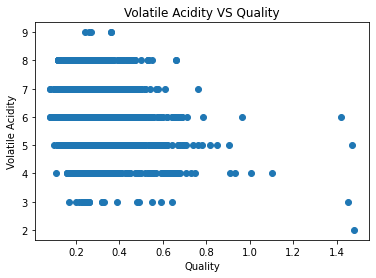

In [30]:
plt.scatter(new_data['volatile_acidity'], new_data['quality'])
plt.title('Volatile Acidity VS Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()


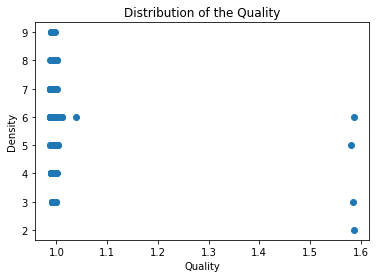

In [31]:
plt.scatter(new_data['density'], new_data['quality'])
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

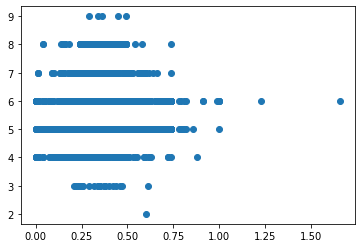

In [32]:
plt.scatter(new_data['citric_acid'], new_data['quality'])
plt.show()


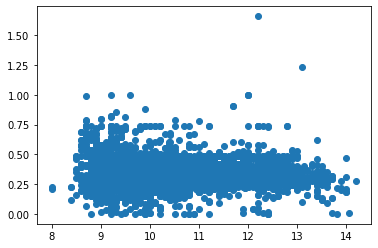

In [33]:
plt.scatter(new_data['alcohol'], new_data['citric_acid'])
plt.show()

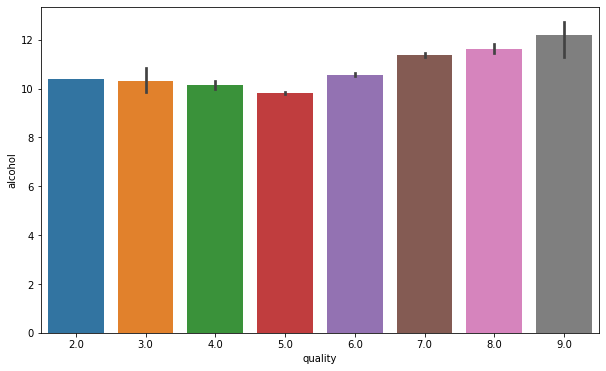

In [34]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = new_data)
plt.show()

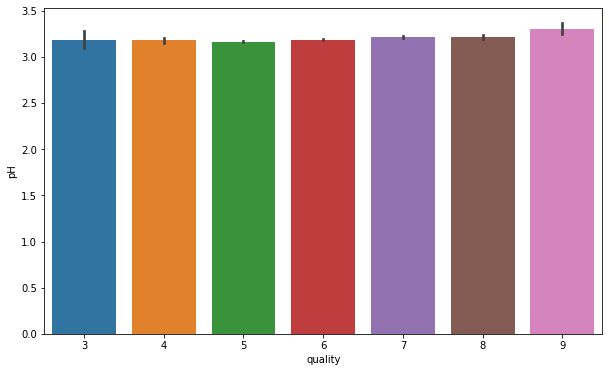

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df_wine)
plt.show()

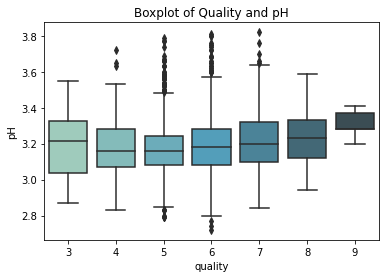

In [36]:
sns.boxplot(x='quality',y='pH',data=df_wine,palette='GnBu_d')
plt.title("Boxplot of Quality and pH")
plt.show()

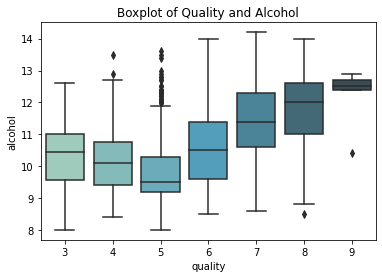

In [37]:
ax = sns.boxplot(x='quality',y='alcohol',data=df_wine,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()



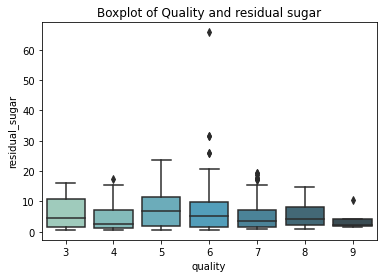

In [38]:
sns.boxplot(x="quality",y="residual_sugar",data=df_wine,palette="GnBu_d")
plt.title("Boxplot of Quality and residual sugar")
plt.show()

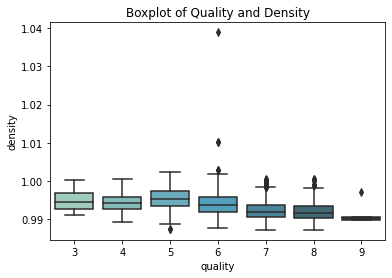

In [39]:
sns.boxplot(x="quality",y="density",data=df_wine,palette="GnBu_d")
plt.title("Boxplot of Quality and Density")
plt.show()

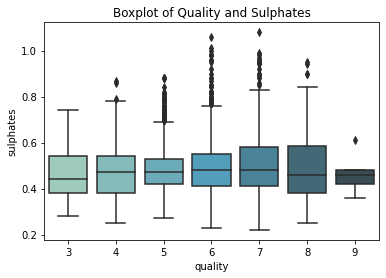

In [40]:
sns.boxplot(x="quality",y="sulphates",data=df_wine,palette="GnBu_d")
plt.title("Boxplot of Quality and Sulphates")
plt.show()

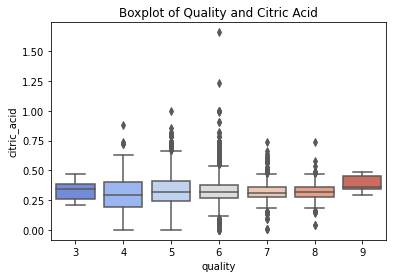

In [41]:
sns.boxplot(x="quality",y="citric_acid",data=df_wine,palette="coolwarm")
plt.title("Boxplot of Quality and Citric Acid")
plt.show()

### Let's count and visualise the total number of different wine samples

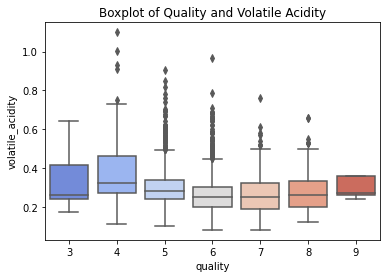

In [42]:
sns.boxplot(x="quality",y="volatile_acidity",data=df_wine,palette="coolwarm")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

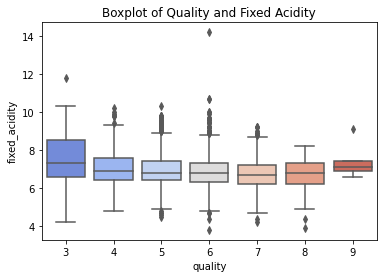

In [43]:
sns.boxplot(x="quality",y="fixed_acidity",data=df_wine,palette="coolwarm")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()


In [15]:
##df['quality'] = df['quality'].where(df['quality']<= 5, 0)
##df['quality'] = df['quality'].where(df['quality']>5, 1)
new_data['quality'] = new_data['quality'].map({10:1,9:1,8:1,7:1,6:1,5:0,4:0,3:0,2:0,1:0})
new_data.quality.value_counts()

1    3259
0    1643
Name: quality, dtype: int64

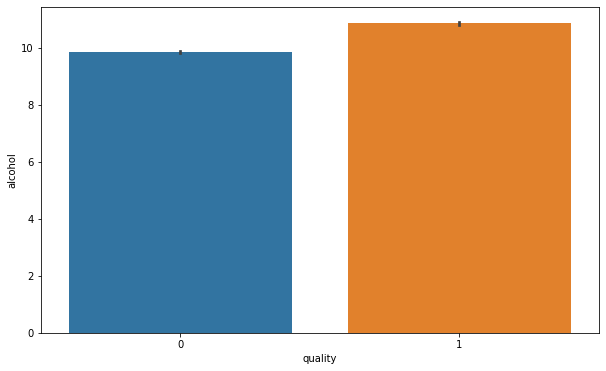

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = new_data)
plt.show()

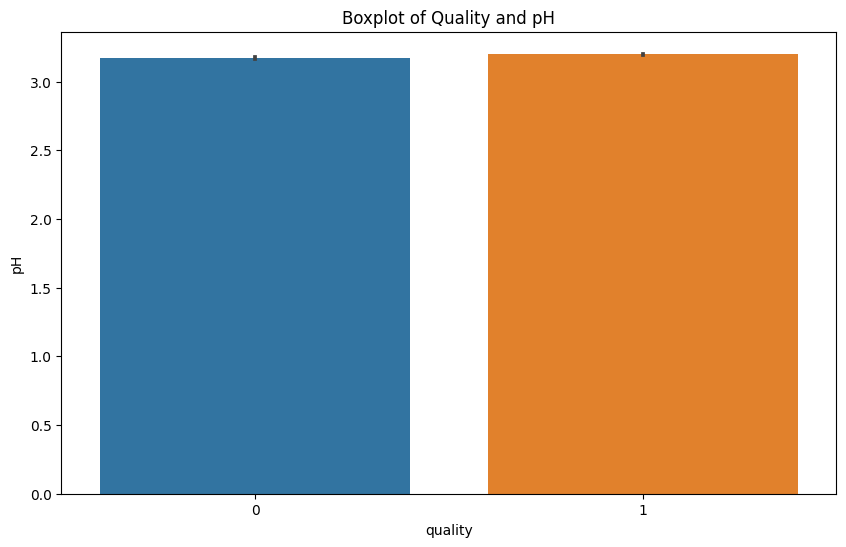

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = new_data)
plt.title("Boxplot of Quality and pH")
plt.show()

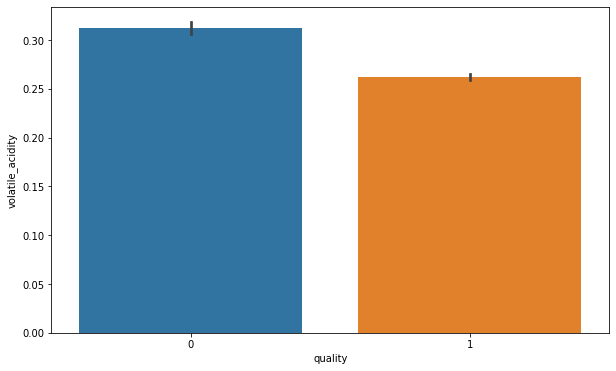

In [47]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = new_data)
plt.show()

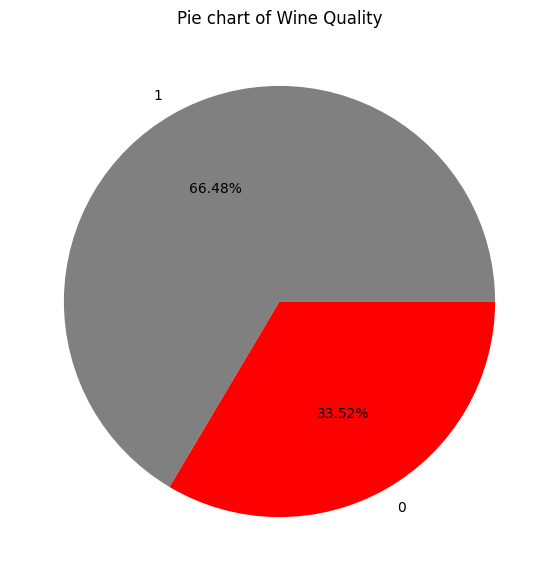

In [24]:
plt.figure(figsize=(7,7))
plt.title("Pie chart of Wine Quality")
plt.pie(new_data['quality'].value_counts(), labels=new_data['quality'].unique(), autopct='%0.2f%%', colors = ['grey', 'red'])
plt.show()


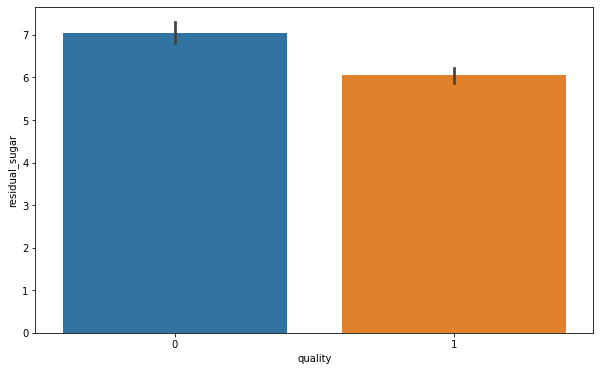

In [48]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = new_data)
plt.show()

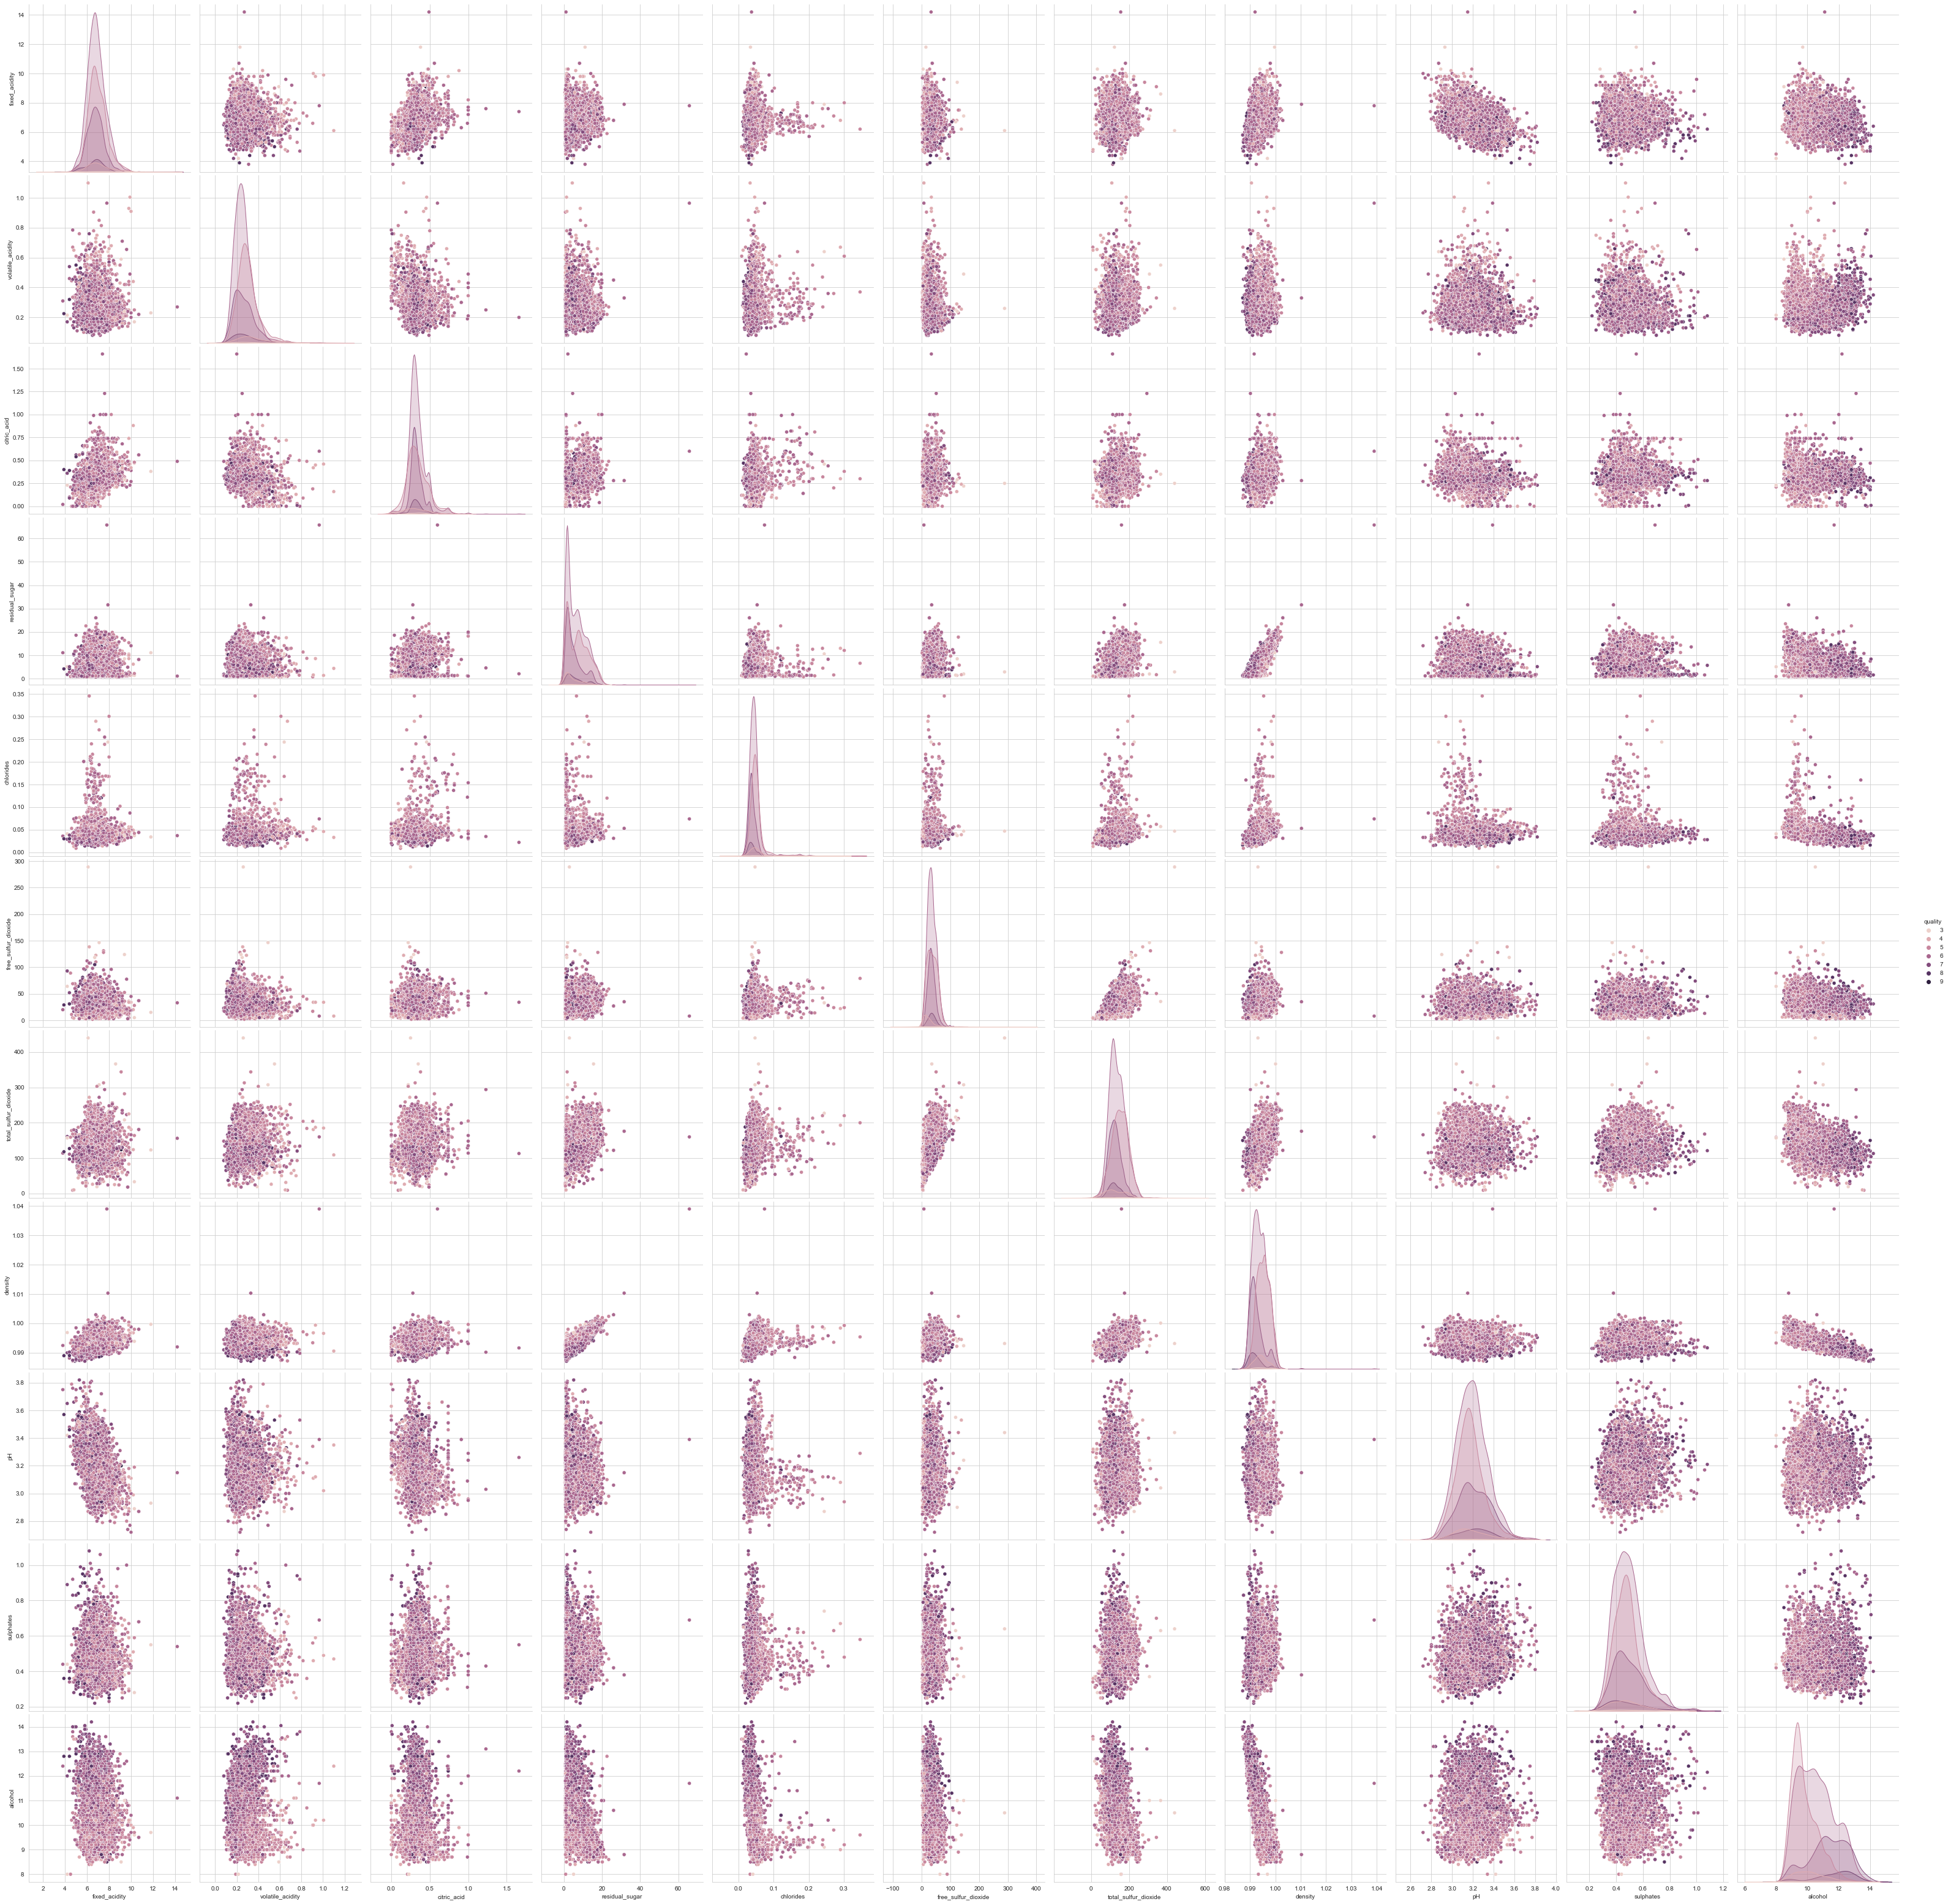

In [31]:
sns.set_style('whitegrid');
sns.pairplot(df_wine, hue = 'quality', height = 4,data = new_data)
plt.show()

In [19]:
X = new_data.drop('quality',axis='columns') ### X includes var ['fixed_acidity', 'volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']
y = new_data['quality']

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=999) # 70% training and 30% test

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred=logmodel.predict(X_test)


c:\users\pm\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [22]:

print("##################### Logistic Regression Model (Logit Model) ########################")
from scipy.sparse.coo import matrix
y=new_data['quality']
x=new_data.drop(['quality'], axis='columns')
logitmodel = sm.Logit(y,x)
result=logitmodel.fit()
print(result.summary2() )
X= sm.add_constant(x)
logitmodel2=sm.Logit(y,X)
result2=logitmodel2.fit()
print(result2.summary2())

##################### Logistic Regression Model (Logit Model) ########################
Optimization terminated successfully.
         Current function value: 0.507062
         Iterations 6
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.205      
Dependent Variable:   quality           AIC:               4993.2360  
Date:                 2022-12-08 18:24  BIC:               5064.7074  
No. Observations:     4902              Log-Likelihood:    -2485.6    
Df Model:             10                LL-Null:           -3126.4    
Df Residuals:         4891              LLR p-value:       3.6644e-269
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------

Decision Tree AUC: 0.7594004810828441


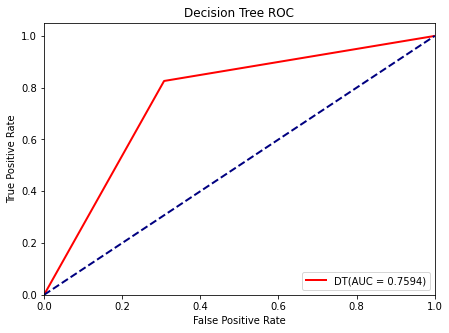

############# DT ###############
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       511
           1       0.83      0.82      0.83       960

    accuracy                           0.78      1471
   macro avg       0.75      0.76      0.75      1471
weighted avg       0.78      0.78      0.78      1471

Confusion Matrix : 
 [[353 158]
 [172 788]]
Predictive value Positive : 0.6723809523809524
Predictive value Negative : 0.8329809725158562
Accuracy :  0.7756628144119646
Sensitivity :  0.6908023483365949
Specificity :  0.8208333333333333


In [23]:

############### DT #################################################
DTclf=tree.DecisionTreeClassifier()
DTclf.fit(X_train, y_train)
#####Predict probabilities for the test data.
probsDT = DTclf.predict_proba(X_test)
####Keep Probabilities of the positive class only.
probsDT = probsDT[:, 1]

###Compute the AUC Score.
auc = roc_auc_score(y_test, probsDT)


print('Decision Tree AUC:', auc)
###Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probsDT)
####Plot ROC Curve 
fig = plt.figure(figsize = (7,5))
lw = 2
plt.plot(fpr, tpr, color='red',lw=lw, label='DT(AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Receiver operating characteristic')
plt.title("Decision Tree ROC")
plt.legend(loc="lower right")
plt.show()

################# DT #################################################

DTclf=tree.DecisionTreeClassifier()

DTclf.fit(X_train, y_train)
y_pred= DTclf.predict(X_test) ##y_test

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# DT ###############')
print(classification_report(y_test, y_pred))


##Print Matrix
cm1 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

#####from confusion matrix calculate Prediction Positive
Prediction_Pos= cm1[0,0]/(cm1[0,0]+cm1[1,0])
print ('Predictive value Positive :', Prediction_Pos)

#####from confusion matrix calculate Prediction Negative
Prediction_Neg= cm1[1,1]/(cm1[1,1]+cm1[0,1])
print ('Predictive value Negative :', Prediction_Neg)

#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

#####from confusion matrix calculate Sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

#####from confusion matrix calculate Specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Random Forest AUC: 0.9105247064579256


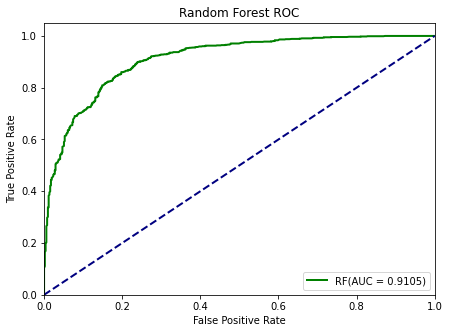

############# RF ###############
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       511
           1       0.86      0.91      0.88       960

    accuracy                           0.85      1471
   macro avg       0.84      0.82      0.83      1471
weighted avg       0.84      0.85      0.84      1471

Confusion Matrix : 
 [[373 138]
 [ 89 871]]
Accuracy :  0.7756628144119646
Prediction value Positive : 0.6723809523809524
Prediction value Negative : 0.8329809725158562
Sensitivity :  0.6908023483365949
Specificity :  0.8208333333333333


In [24]:
################# RF ############################################

from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier(n_estimators=1000)
RFclf.fit(X_train, y_train)
#y_pred=RFclf.predict(X_test)

#####Predict probabilities for the test data.
probsRF = RFclf.predict_proba(X_test)

####Keep Probabilities of the positive class only.
probsRF = probsRF[:, 1]

auc2 = roc_auc_score(y_test, probsRF)
print('Random Forest AUC:', auc2)

###Get the ROC Curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probsRF)
fig = plt.figure(figsize = (7,5))
lw = 2
plt.plot(fpr2, tpr2, color='green',
lw=lw, label='RF(AUC = %0.4f)' % auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##plt.title('Receiver operating characteristic')
plt.title("Random Forest ROC")
plt.legend(loc="lower right")
plt.show()

################### RF ############################################

RFclf=RandomForestClassifier(n_estimators=101)
RFclf.fit(X_train, y_train)
y_pred=RFclf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# RF ###############')
print(classification_report(y_test, y_pred))

cm2 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm2)

total2=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2=(cm1[0,0]+cm1[1,1])/total2
print ('Accuracy : ', accuracy2)

#####from confusion matrix calculate Prediction Positive
Prediction_Pos2= cm1[0,0]/(cm1[0,0]+cm1[1,0])
print ('Prediction value Positive :', Prediction_Pos2)

#####from confusion matrix calculate Prediction Negative
Prediction_Neg2= cm1[1,1]/(cm1[1,1]+cm1[0,1])
print ('Prediction value Negative :', Prediction_Neg2)

#####from confusion matrix calculate Sensitivity
sensitivity2 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity2 )

#####from confusion matrix calculate Specificity
specificity2 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity2)


Support Vector Machine AUC: 0.7884682811480757


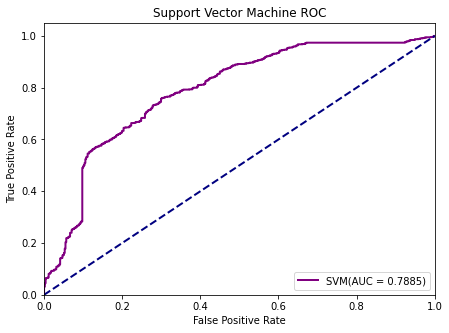

############# SVM ###############
              precision    recall  f1-score   support

           0       0.60      0.01      0.01       511
           1       0.65      1.00      0.79       960

    accuracy                           0.65      1471
   macro avg       0.63      0.50      0.40      1471
weighted avg       0.63      0.65      0.52      1471

Confusion Matrix : 
 [[  3 508]
 [  2 958]]
Predictive value Positive : 0.6
Predictive value Negative : 0.6534788540245566
Accuracy :  0.6532970768184908
Sensitivity :  0.005870841487279843
Specificity :  0.9979166666666667


In [25]:
####################### SVM ######################################

SVclf2 = SVC(kernel='rbf', C=10, gamma='auto')

#### (kernel='poly', degree=4), kernel='linear', Gaussian kernel: kernel = 'rbf', kernel='sigmoid'
SVclf2.fit(X_train, y_train)

#y_pred=SVclf2.predict(X_test)
probsSV = SVclf2.fit(X_train, y_train).decision_function(X_test)

###Compute the AUC Score.
auc3 = roc_auc_score(y_test, probsSV)
print('Support Vector Machine AUC:', auc3)

###Get the ROC Curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, probsSV)
fig = plt.figure(figsize = (7,5))
lw = 2
plt.plot(fpr3, tpr3, color='purple',
lw=lw, label='SVM(AUC = %0.4f)' % auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##plt.title('Receiver operating characteristic')
plt.title("Support Vector Machine ROC")
plt.legend(loc="lower right")
plt.show()

######################### SVM ######################################
SVclf = SVC(kernel='poly', degree=3)
#### can use other kernel depending your data features, e.g., (kernel='poly', degree=4), kernel='linear', Gaussian kernel: kernel = 'rbf', kernel='sigmoid'

SVclf.fit(X_train, y_train)
y_pred=SVclf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# SVM ###############')
print(classification_report(y_test, y_pred))

cm3 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm3)

total3=sum(sum(cm3))

#####from confusion matrix calculate Prediction Positive
Prediction_Pos3= cm3[0,0]/(cm3[0,0]+cm3[1,0])
print ('Predictive value Positive :', Prediction_Pos3)

#####from confusion matrix calculate Prediction Negative
Prediction_Neg3= cm3[1,1]/(cm3[1,1]+cm3[0,1])
print ('Predictive value Negative :', Prediction_Neg3)

#####from confusion matrix calculate accuracy
accuracy3=(cm3[0,0]+cm3[1,1])/total3
print ('Accuracy : ', accuracy3)

#####from confusion matrix calculate Sensitivity
sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity3 )

#####from confusion matrix calculate Specificity
specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity3)


c:\users\pm\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Linear Regression AUC4: 0.7808198793215917


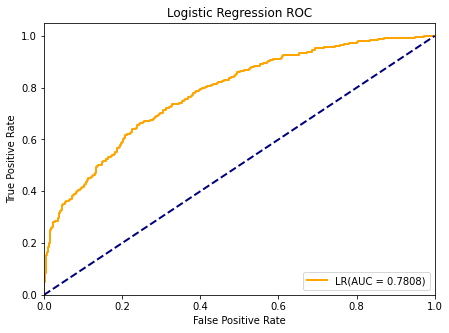

############# Logistic Reg ###############
              precision    recall  f1-score   support

           0       0.71      0.41      0.52       511
           1       0.74      0.91      0.82       960

    accuracy                           0.74      1471
   macro avg       0.73      0.66      0.67      1471
weighted avg       0.73      0.74      0.72      1471

Confusion Matrix : 
 [[211 300]
 [ 86 874]]
Accuracy :  0.7756628144119646
Prediction value Positive : 0.7104377104377104
Prediction value Negative : 0.7444633730834753
Sensitivity :  0.41291585127201563
Specificity :  0.9104166666666667


In [26]:
############################# Logistic Regression ###########################

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred=logmodel.predict(X_test)

## calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
auc4 = roc_auc_score(y_test, preds)
print('Linear Regression AUC4:', auc4)

###Get the ROC Curve
fpr4, tpr4, thresholds5 = roc_curve(y_test, preds)
fig = plt.figure(figsize = (7,5))
lw = 2
plt.plot(fpr4, tpr4, color='orange',
lw=lw, label='LR(AUC = %0.4f)' % auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##plt.title('Receiver operating characteristic')
plt.title("Logistic Regression ROC")
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('############# Logistic Reg ###############')
print(classification_report(y_test, y_pred))

cm4 = confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', cm4)

total4=sum(sum(cm4))

#####from confusion matrix calculate accuracy
accuracy4=(cm4[0,0]+cm4[1,1])/total4
print ('Accuracy : ', accuracy1)

#####from confusion matrix calculate Prediction Positive
Prediction_Pos4 = cm4[0,0]/(cm4[0,0]+cm4[1,0])
print ('Prediction value Positive :', Prediction_Pos4)

#####from confusion matrix calculate Prediction Negative
Prediction_Neg4 = cm4[1,1]/(cm4[1,1]+cm4[0,1])
print ('Prediction value Negative :', Prediction_Neg4)

#####from confusion matrix calculate Sensitivity
sensitivity4 = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity4 )

#####from confusion matrix calculate Specificity
specificity4 = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity4)

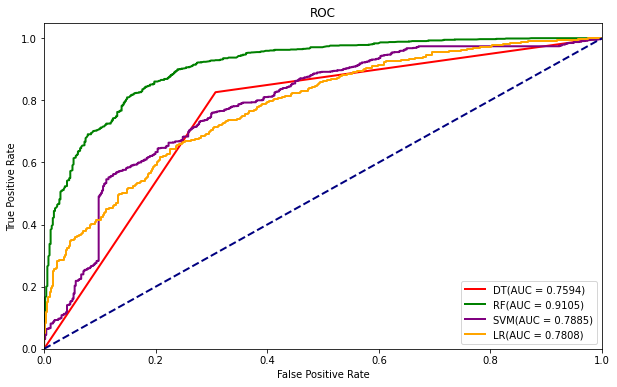

#########################################################
Decission Tree AUC: 0.7594004810828441
Random Forest AUC2: 0.9105247064579256
Support Vector Machine AUC3: 0.7884682811480757
Linear Regression AUC4: 0.7808198793215917
#########################################################


In [27]:
###Get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probsDT)
fpr2, tpr2, thresholds2 = roc_curve(y_test, probsRF)
fpr3, tpr3, thresholds3 = roc_curve(y_test, probsSV)
fpr4, tpr4, thresholds5 = roc_curve(y_test, preds)
fig = plt.figure(figsize = (10,6))
lw = 2
plt.plot(fpr, tpr, color='red',
lw=lw, label='DT(AUC = %0.4f)' % auc)
plt.plot(fpr2, tpr2, color='green',
lw=lw, label='RF(AUC = %0.4f)' % auc2)
plt.plot(fpr3, tpr3, color='purple',
lw=lw, label='SVM(AUC = %0.4f)' % auc3)
plt.plot(fpr4, tpr4, color='orange',
lw=lw, label='LR(AUC = %0.4f)' % auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##plt.title('Receiver operating characteristic')
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

print("#########################################################")
print('Decission Tree AUC:', auc)
print('Random Forest AUC2:', auc2)
print('Support Vector Machine AUC3:', auc3)
print('Linear Regression AUC4:', auc4)
print("#########################################################")
